In [1]:
import bk.load
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.animation as animation
%matplotlib qt

In [2]:
import os

In [3]:
path = 'Z:\Rat08\Rat08-20130713'
bk.load.current_session(path)

lfp = bk.load.lfp(5060,5120,166,list(np.arange(0,25,1)))
lfp = lfp.drop(columns=19)

Rat : 8 on day : 6
Working with session Rat08-20130713 @ Z:\Rat08\Rat08-20130713
Load LFP from Rat08-20130713.lfp


In [3]:
path = '/media/billel/GGLab-01-BK/DATA/Rat08-20130713/'
os.chdir(path)
bk.load.path = path
bk.load.rat = 8
bk.load.session = 'Rat08-20130713'
bk.load.day = 6

In [5]:
jet = matplotlib.cm.get_cmap('jet')
viridis = matplotlib.cm.get_cmap('viridis')

cclor = list(np.linspace(0,255,30).astype('uint16'))

In [6]:
def init():
    for j in range(lfp.shape[1]):
        plt.plot(lfp.as_units('s').index,
             scipy.stats.zscore(lfp.values[:,j],0)-5*j,
             c = viridis(cclor[j]))
def animate(i):
    dt = 20
    t = lfp.as_units('s').index[i*dt]
    plt.xlim(t-1,t+1)

In [ ]:
fig = plt.figure()
anim = animation.FuncAnimation(fig,animate, init_func = init, frames =  60*60)
anim.save('animation.mp4',fps = 60,dpi = 300)

In [339]:
# for i in range(a.shape[1]):
#     plt.plot(a.as_units('s').index,scipy.stats.zscore(a.values[:,i],0)-5*i,c = viridis(cclor[i*5]))

# plt.xlim(a.as_units('s').index[0]-1,a.as_units('s').index[0]+1)

# t0 = a.as_units('s').index[0]
# dt = 1/250
# t=t0

# for i in range(60*30):
#     t = t+dt
#     plt.xlim(t-1,t+1)
#     plt.pause(1/250)

KeyboardInterrupt: 

In [10]:
import scipy.signal

In [22]:
states = bk.load.states()
lfp = bk.load.lfp(0,5,166,13)

In [23]:
%matplotlib inline

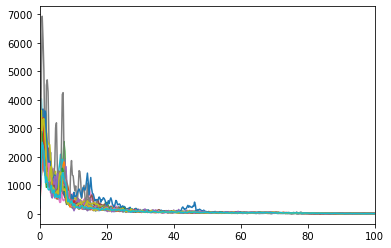

In [145]:
lfps = []
psds = np.zeros_like(psd)
for j in states['Rem'].as_units('s').iloc:
    lfps.append(bk.load.lfp(j.start,j.end,166,105))

for l in lfps:
    freq, psd = scipy.signal.welch(l.values,1250,nperseg=5000,noverlap=4000,scaling='spectrum')
    psds = np.vstack((psds,psd))
    plt.plot(freq,psd)
    plt.xlim([0,100])

In [140]:
print(psds[:,0])

[    0.        348.51514   421.09552   395.4497    216.00653   561.45465
   521.02246   381.39722   597.64984   663.60114   523.5202    414.47223
   467.62607   267.157     599.6265   1927.3938  12726.104     524.0973
   339.68405   417.2465    321.2167    317.1439    287.64294   632.1909
   524.7188    229.80661   451.57574   429.28107   373.67883   523.546
   265.13794]


In [177]:
%matplotlib qt

In [178]:
a = np.mean(psds,0)
v = np.var(psds,0)

In [179]:
plt.plot(freq,(np.log(a)-v)/(v**2))
plt.xlim([0,100])


(0.0, 100.0)

/home/billel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


(0.0, 10.0)

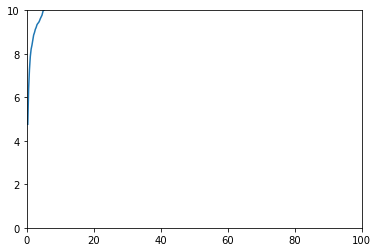

In [152]:
plt.plot(freq,np.log(np.mean(psds,0)*freq**2))
plt.xlim([0,100])
plt.ylim(0,10)

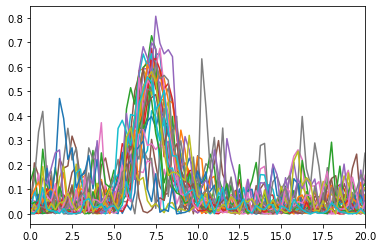

In [74]:
stru = ['Hpc','BLA']
electrodes = [23,150]
lfps = {}
cohe = np.zeros_like(coh)
for j in states['Rem'].as_units('s').iloc:
    for s,e in zip(stru,electrodes):
        lfps.update({s:bk.load.lfp(j.start,j.end,166,e)})
    freq,coh = scipy.signal.coherence(lfps[stru[0]].values,lfps[stru[1]].values,fs = 1250,nperseg = 5000,noverlap = 4500)
    cohe = np.vstack((cohe,coh))
    plt.plot(freq,coh)
    plt.xlim([0,20])

(0.0, 20.0)

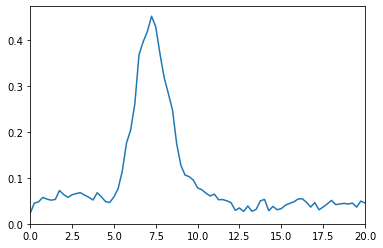

In [45]:
plt.plot(freq,np.mean(cohe,0))
plt.xlim([0,20])